In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from Hamiltonians import IsingGrid

In [41]:
image_path = Path('./ThesisGraphics')
J = 1
L = 200
timestamps = 5000000
T_list = [1.5, 2.0, 2.27, 2.5, 3.0]
p = 0.58
grids = []

In [42]:
current_grid = None
for i, T in enumerate(T_list):
    ising = IsingGrid(L, J)
    if i == 0:
        grid, spin, en = ising.metropolis(timestamps, T, probability=p, initialize=True)
        current_grid = grid
    else:
        ising.set_lattice(current_grid)
        grid, spin, en = ising.metropolis(timestamps, T, initialize=False)
        current_grid = grid
    grids.append(current_grid)

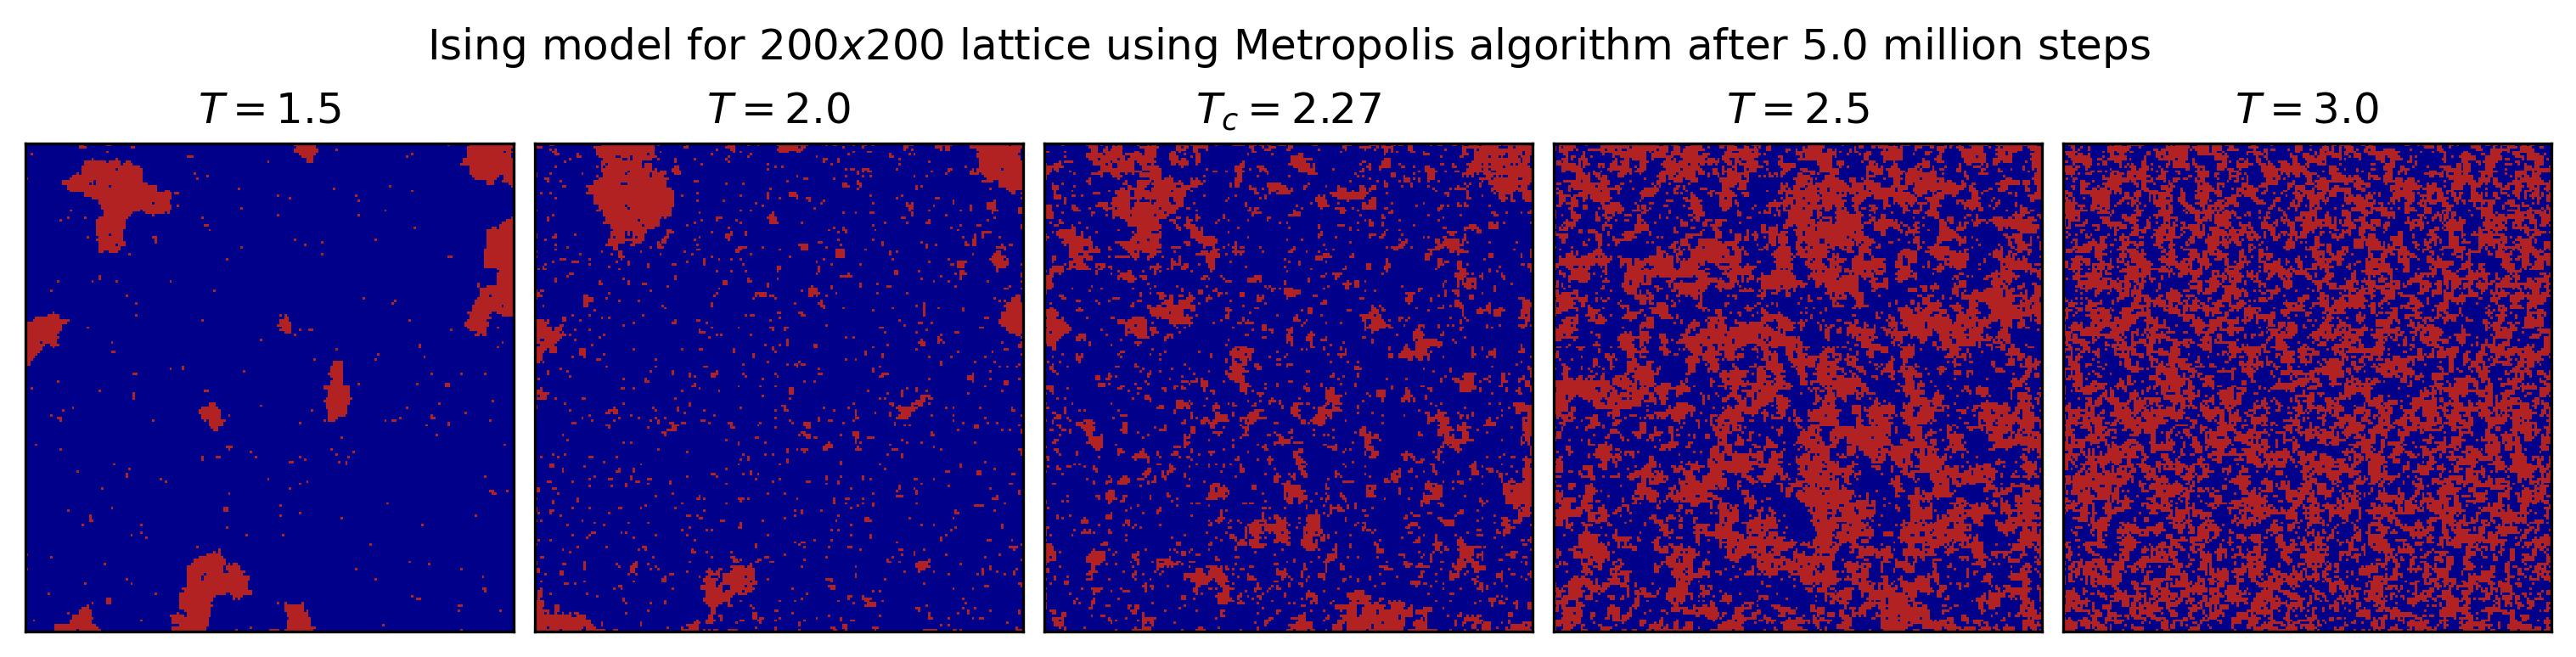

In [43]:
figure, axes = plt.subplots(1, 5, layout='constrained', figsize=(10, 2.5), dpi=300)
cmap = LinearSegmentedColormap.from_list('', ['darkblue', 'firebrick'], 2)
for index, (T, grid, ax) in enumerate(zip(T_list, grids, figure.axes)):
    ax.imshow(grid, cmap=cmap, interpolation='none')
    ax.set(xticks=[], yticks=[], title=f'$T = {T}$' if index != 2 else f'$T_c = {T}$')
figure.suptitle(f'Ising model for ${L}x{L}$ lattice using Metropolis algorithm '
                f'after {timestamps / 1_000_000:.1f} million steps')
figure.savefig(image_path / f'IsingGridL{L}.png');

In [27]:
dt = 100_000
intervals = [0, 2, 6, 15, 50]
T = 1.2
p = 0.54
ising = IsingGrid(L, J)
ising.initialize_grid(probability=p)
grid_snapshots = []
dt_stamps = []
for interval in intervals:
    mc_steps = interval * dt
    grid, spin, en = ising.metropolis(timestamp=mc_steps, T=T, initialize=False)
    grid_snapshots.append(grid)
    dt_stamps.append(mc_steps / 1_000_000)

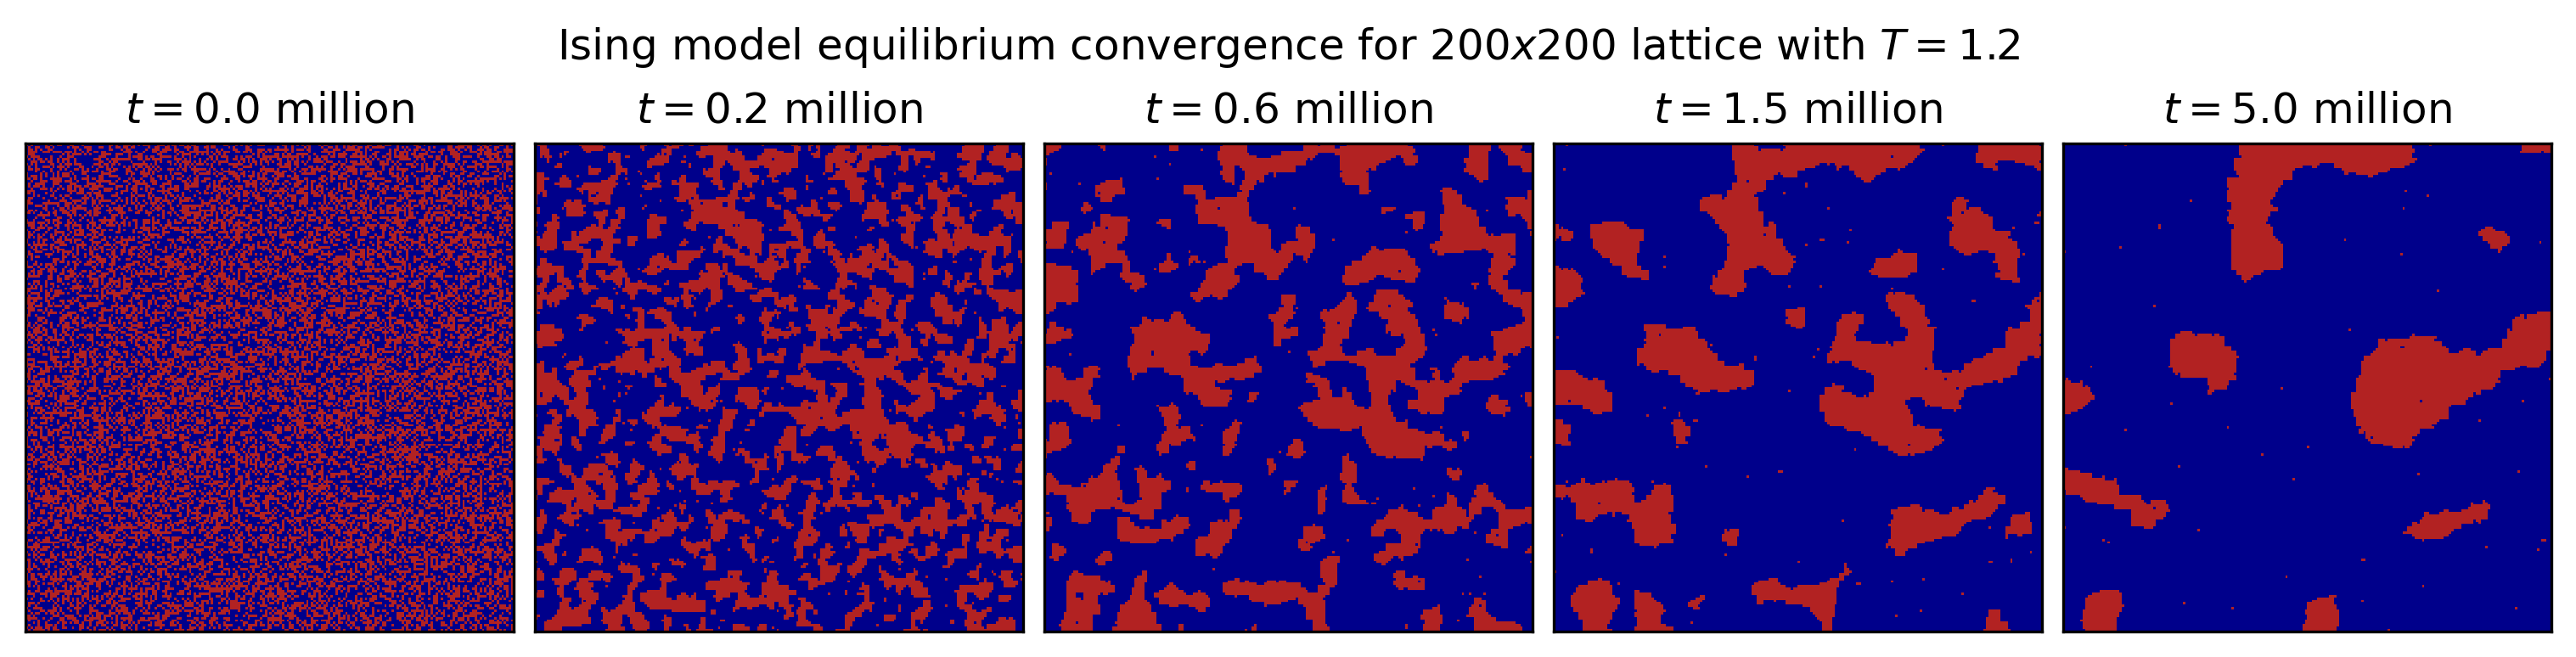

In [28]:
figure, axes = plt.subplots(1, 5, layout='constrained', figsize=(10, 2.5), dpi=300)
for index, (grid, t, ax) in enumerate(zip(grid_snapshots, dt_stamps, figure.axes), start=1):
    ax.imshow(grid, cmap=cmap, interpolation='none')
    ax.set(xticks=[], yticks=[], title=f'$t = {t:.1f}$ million')
figure.suptitle(f'Ising model equilibrium convergence for ${L}x{L}$ lattice with $T = {T}$')
figure.savefig(image_path / f'IsingEquilibriumL{L}.png');